### PCA on Images

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [110]:
def pca(img_file, num_components=20):
    """
    Run PCA on an image and get recontruction back from PCA components.
    """
    img = cv2.imread(img_file)#, cv2.IMREAD_GRAYSCALE)
    print(f"Original Image Shape: {img.shape}")

    pca = PCA(n_components=num_components)
    z0 = pca.fit_transform(img[:, :, 0])
    z0_inverse = pca.inverse_transform(z0)
    z = np.array([z0_inverse])#/255.0
    z = np.moveaxis(z, 0, 2)
    print(f"PCA Components Shape: {z0.shape}")
    
    return pca, z

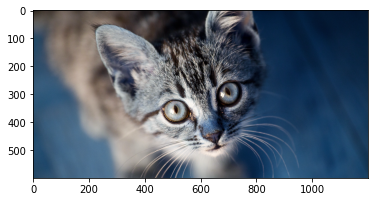

In [111]:
# path to the image file
img_file = "cat.png"

#plot the image
plt.imshow(cv2.imread(img_file));

Original Image Shape: (600, 1200, 3)
PCA Components Shape: (600, 15)


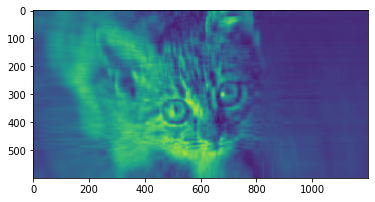

In [112]:
mod, z = pca(img_file, num_components=15)
plt.imshow(z);

Text(0, 0.5, 'Explained variance')

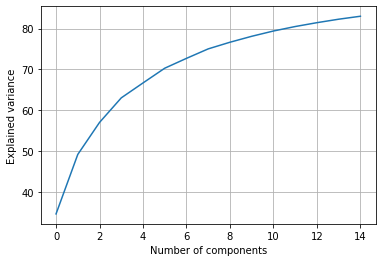

In [113]:
plt.grid()
plt.plot(np.cumsum(mod.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')